# External Data Sources

> Abstract: Here we show short introductions to Python packages that provide access to various other data sources.

In [1]:
%load_ext watermark
%watermark -i -v -p hapiclient

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

hapiclient: 0.2.5



## HAPI (hapiclient)

The [Heliophysics Data Application Programmer’s Interface (HAPI)](http://hapi-server.org/) specification provides a common framework being adopted by many data providers across heliophysics. The aim is to ease sharing of data between different services and support an interoperable ecosystem. All components are [developed openly on GitHub](https://github.com/hapi-server/) where you will find client software in various languages (MATLAB, Java, IDL etc.) to access data from HAPI servers. In this section we demonstrate how to use the Python package, [`hapiclient`](https://github.com/hapi-server/client-python), that provides very similar functionality to `viresclient`. For more examples, [see here](https://github.com/hapi-server/client-python-notebooks).

To discover what servers and data are out there, try the [HAPI server browser](http://hapi-server.org/servers/). This lets you browse the catalogs and generate preview images of data as well as the Python script necessary to access the data yourself.

Here is [an example](http://hapi-server.org/servers/#server=SSCWeb&dataset=iss&parameters=X_GEO&start=2020-01-01T00:00:00.00&stop=2020-01-02T00:00:00.00&return=script&format=python) of accessing the position of the ISS using the HAPI server provided by [NASA's Satellite Situation Center service (SSCWeb)](https://sscweb.gsfc.nasa.gov/):

In [2]:
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/SSCWeb/hapi';
dataset    = 'iss';
# Use parameters='' to request all data. Multiple parameters
# can be requested using a comma-separated list, e.g., parameters='X_TOD,Y_TOD'
parameters = 'X_GEO,Y_GEO,Z_GEO'; 
start      = '2020-01-01T00:00:00.00';
stop       = '2020-01-02T00:00:00.00';

data, meta = hapi(server, dataset, parameters, start, stop)

Data are automatically loaded as a [NumPy structured array](https://numpy.org/doc/stable/user/basics.rec.html) and metadata as a dictionary:

In [3]:
data

array([(b'2020-001T00:00:00Z', -0.11105764,  0.65621122,  0.8300275 ),
       (b'2020-001T00:01:00Z', -0.17963564,  0.65040395,  0.82257963),
       (b'2020-001T00:02:00Z', -0.24745595,  0.64222876,  0.81135568),
       ...,
       (b'2020-001T23:57:00Z', -0.12685546, -0.65262311, -0.83431709),
       (b'2020-001T23:58:00Z', -0.05823442, -0.65973535, -0.83633816),
       (b'2020-001T23:59:00Z',  0.01059807, -0.66446651, -0.83455147)],
      dtype=[('Time', 'S18'), ('X_GEO', '<f8'), ('Y_GEO', '<f8'), ('Z_GEO', '<f8')])

In [4]:
meta

{'startDate': '1998-11-21T00:00:00.000Z',
 'stopDate': '2024-02-05T00:00:00.000Z',
 'cadence': 'PT60S',
 'description': 'ISS ephemeris',
 'resourceURL': 'https://sscweb.gsfc.nasa.gov/',
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'fill': None,
   'length': 18},
  {'name': 'X_GEO',
   'description': 'X Position in the Geographic coordinate system, also known as Greenwich Rotating Coordinates GRC, or Earth-fixed Greenwich EFG',
   'units': 'R_E',
   'fill': '1e31',
   'type': 'double'},
  {'name': 'Y_GEO',
   'description': 'Y Position in the Geographic coordinate system, also known as Greenwich Rotating Coordinates GRC, or Earth-fixed Greenwich EFG',
   'units': 'R_E',
   'fill': '1e31',
   'type': 'double'},
  {'name': 'Z_GEO',
   'description': 'Z Position in the Geographic coordinate system, also known as Greenwich Rotating Coordinates GRC, or Earth-fixed Greenwich EFG',
   'units': 'R_E',
   'fill': '1e31',
   'type': 'double'}],
 'HAPI': '2.0',
 'st

---

`hapiclient` also provides tools for intelligent automatic plotting of data with the `hapiplot` package. `hapiplot` is currently not installed but we can patch it in on-the-fly and use it:

In [5]:
%pip install "git+https://github.com/hapi-server/plot-python@f95ce860d456dd9278a62897d6f83d416c988273" --quiet

from hapiplot import hapiplot

Note: you may need to restart the kernel to use updated packages.


(NB: We are using a more recent development version of hapiplot, rather than what is on PyPI)

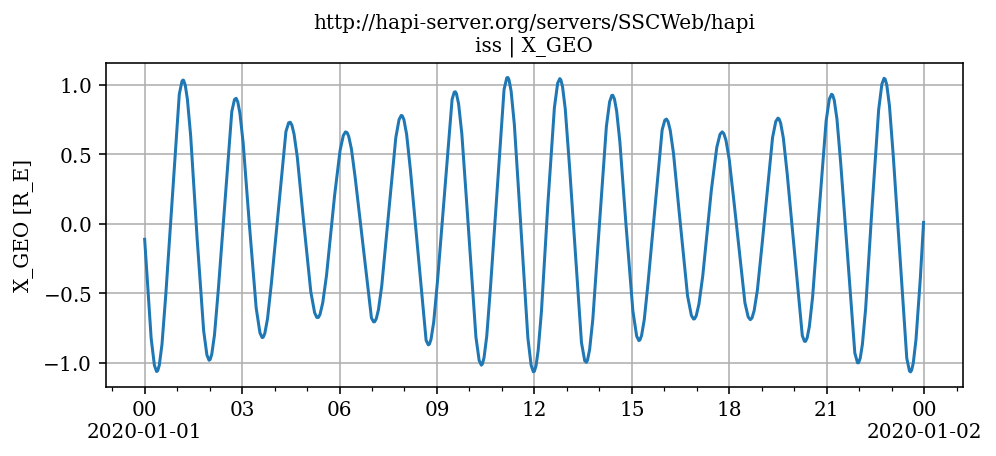

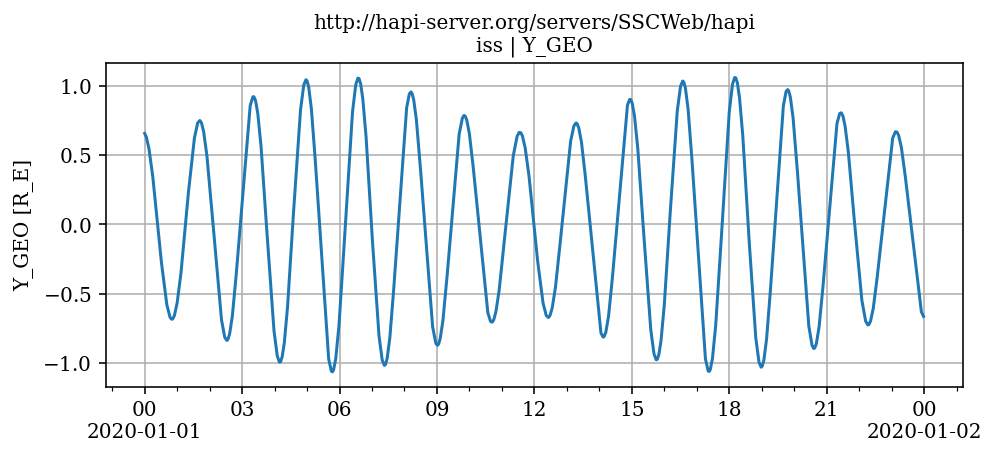

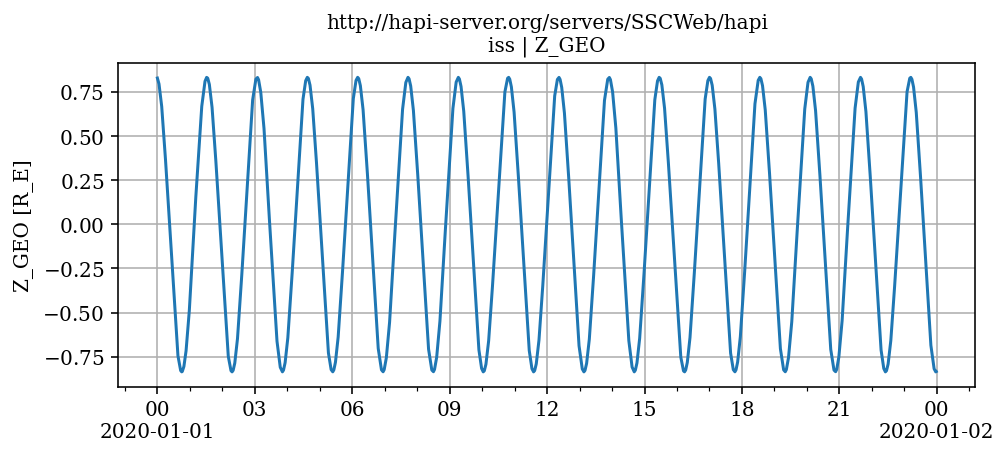

In [6]:
hapiplot(data, meta);